##***Importing Libraries***
---



---

*italicized text*

In [174]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns           #used for data visualization
import warnings                 #avoid warning flash
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix


**Reading data file**

In [ ]:
data=pd.read_csv("lung_cancer_examples.csv")

**Checking data samples**

In [ ]:
data.head()


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


Dropping Name and Surname Columns

In [ ]:
data = data.drop(['Name', 'Surname'], axis=1)
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


Data columns

In [ ]:
data.columns


Index(['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [ ]:
data.dtypes

Age       int64
Smokes    int64
AreaQ     int64
Alkhol    int64
Result    int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


Checking for duplicates

In [ ]:

if data.duplicated().any():
  print("Data Contains Duplicates")
else:
  print ("No Duplicates found!")

No Duplicates found!


In [ ]:
data = data.drop_duplicates() 

Checking for null enteries

In [ ]:
data.isnull()        # return all result with true (where its null)
data.isnull().sum()  # return the count of null in whole data set

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

Scatterplot for observing relation between Age and Alcohol

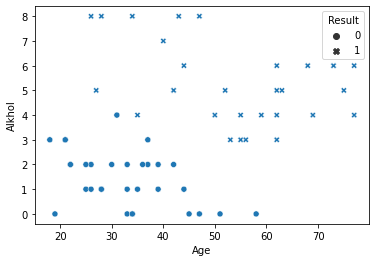

In [141]:
sns.scatterplot(x= data['Age'], y= data['Alkhol'], data= data, style= data['Result']) 

# NAIVE BAYES

Checking for Correlation

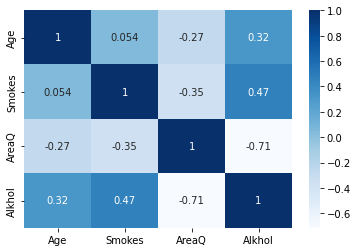

In [ ]:
corelation = (data.drop(['Result'], axis=1).corr())
sns.heatmap(corelation,cmap="Blues", annot=True) 
plt.show()

In [ ]:
target = data.Result
inputs = data.drop('Result',axis='columns')

#Check for NA values
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

Testing and Training dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (inputs,target,test_size=0.2)

print("Total entities:",len(inputs))
print("Training entities",len(X_train))
print('Testing entities',len(X_test))

Total entities: 59
Training entities 47
Testing entities 12


In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.9166666666666666

In [ ]:
y_test[:10]

7     0
35    0
55    1
54    0
29    1
18    1
0     1
53    0
4     1
5     0
Name: Result, dtype: int64

In [ ]:
model.predict(X_test[:10])

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
model.predict_proba(X_test[:10])


array([[9.92018562e-01, 7.98143756e-03],
       [9.99519942e-01, 4.80058039e-04],
       [5.36077182e-05, 9.99946392e-01],
       [9.99397459e-01, 6.02541061e-04],
       [9.95250976e-08, 9.99999900e-01],
       [8.17604586e-02, 9.18239541e-01],
       [8.54644988e-01, 1.45355012e-01],
       [9.82151519e-01, 1.78484805e-02],
       [4.82231796e-05, 9.99951777e-01],
       [9.99999900e-01, 9.95493524e-08]])

In [ ]:
#For any new case, we can input the data and find model prediction
new_example = [[27,20,2,5]]
model.predict(new_example)

array([1])

In [ ]:
print("Report: ")
pk =classification_report(y_test,y_predict)
print (pk)


Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



In [209]:
mean_squared_error(y_test,y_predict)

0.08333333333333333

In [177]:
confusion_matrix(y_test,y_predict)

array([[7, 0],
       [1, 4]])

.

# **Logistic Regression**


---



---



Testing and Training dataset

In [138]:
X2_train, X2_test, y2_train, y2_test = train_test_split(inputs,target,test_size=0.4)
model2 = LogisticRegression()

In [139]:
model2.fit(X2_train,y2_train)

LogisticRegression()

In [140]:
model2.score(X2_test,y2_test)

0.9583333333333334

In [ ]:
y2_test[:10]

55    1
39    0
26    0
49    1
1     1
20    1
17    0
5     0
12    0
47    0
Name: Result, dtype: int64

In [ ]:
model2.predict(X2_test[:10])

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
model2.score(X2_test,y2_test)

1.0

In [169]:
y2_predict = model2.predict(X2_test)

In [172]:
print("Report: ")
pk =classification_report(y2_test,y2_predict)
print (pk)

Report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.96        14

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [208]:
mean_squared_error(y2_test,y2_predict)

0.041666666666666664

In [178]:
confusion_matrix(y2_test,y2_predict)

array([[10,  0],
       [ 1, 13]])

# **K-Nearest Neighbour**

---



---



Testing and Training dataset

In [179]:
X3_train, X3_test, y3_train, y3_test = train_test_split(inputs, target, test_size=0.4)

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)

In [193]:
#Train the model using the training sets
knn.fit(X3_train, y3_train)

KNeighborsClassifier()

In [194]:
y3_predict = knn.predict(X3_test)

In [195]:
y3_test[:10]

16    1
24    1
17    0
4     1
44    0
37    1
28    1
26    0
21    0
57    1
Name: Result, dtype: int64

In [196]:
knn_predict = knn.predict(X3_test)

In [197]:
knn.predict(X3_test[:10])

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [204]:
new_test = [[53,20,6,3]]
print(knn.predict(new_test))

[1]


In [203]:
knn.score(X2_test,y2_test)

0.9583333333333334

In [206]:
print("Report: ")
knn_report =classification_report(y3_test,knn_predict)
print (knn_report)

Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



In [210]:
mean_squared_error(y3_test,knn_predict)

0.08333333333333333

In [200]:
confusion_matrix(y3_test,knn_predict)

array([[10,  2],
       [ 0, 12]])